# 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [18]:
df = pd.read_csv("B_to_J_Psi_xsec.csv", delimiter=",", dtype=float)

In [19]:
df.keys()

Index([u'ptmin(GeV)', u'ptmax(GeV)', u'y', u'xsec(pb)'], dtype='object')

In [20]:
np.sum(df["xsec(pb)"])

1377943.4354247716

In [21]:
df

,ptmin(GeV),ptmax(GeV),y,xsec(pb)
0,0.5,1.0,5.0000,9.467900e+04
1,0.5,1.0,5.1034,8.582800e+04
2,0.5,1.0,5.2069,7.731900e+04
3,0.5,1.0,5.3103,6.920700e+04
4,0.5,1.0,5.4138,6.154200e+04
5,0.5,1.0,5.5172,5.433100e+04
6,0.5,1.0,5.6207,4.760800e+04
7,0.5,1.0,5.7241,4.138800e+04
8,0.5,1.0,5.8276,3.567900e+04
9,0.5,1.0,5.9310,3.049100e+04


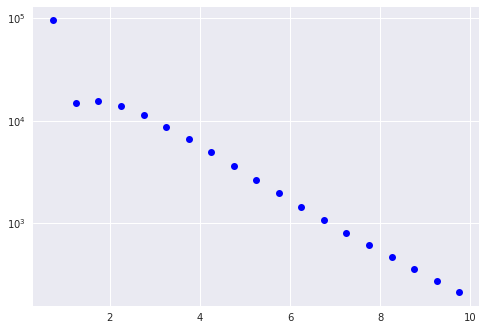

In [22]:
x = 0.5*(df[df["y"]==5]["ptmin(GeV)"] + df[df["y"]==5]["ptmax(GeV)"])
y = df[df["y"]==5]["xsec(pb)"]
plt.plot(x,y, "bo")
plt.yscale("log")

In [23]:
data = []
m = 3.0969 # GeV (J_Psi Mass) 

dy = df.iloc[:,2][1] - df.iloc[:,2][0]

for row in df.values:
    
    pt_min = row[0]
    pt_max = row[1]
    y      = row[2]
    
    y_min  = y - 0.5 * dy
    y_max  = y + 0.5 * dy
    xsec   = row[3]
    
    pz_min     = (pt_min**2 + m**2)**0.5 * np.sinh(y_min)
    pz_max     = (pt_max**2 + m**2)**0.5 * np.sinh(y_max)
    
    p_min      = (pt_min**2 + pz_min**2)**0.5
    theta_min  = np.arctan(pt_min/pz_min)
    feyn_x_min = 2*pz_max/13000
    
    p_max      = (pt_max**2 + pz_max**2)**0.5
    theta_max  = np.arctan(pt_max/pz_max)
    feyn_x_max = 2*pz_max/13000
    
    if feyn_x_min<1 and feyn_x_max<1:
        data.append(np.array([theta_min, theta_max, p_min, p_max, xsec]))

In [24]:
np.savetxt("J_Psi.txt", data, delimiter=",",fmt="%.3e", 
           header="\
FONLL heavy quark hadroproduction cross section\n\
ebeam1 = 6500, ebeam2 = 6500\n\
PDF set = CTEQ6.6\n\
beauty to B to J_Psi meson\n\
BR(q->meson) = 0.7\n\
BR(B->J/psi) = 0.0116\n\
theta_min, theta_max, p_min[GeV], p_max[GeV], xsec[pb]")

In [26]:
df = pd.read_csv("J_Psi.txt", delimiter=",", dtype=float, header=6)

In [ ]:
np.sum(df[" xsec[pb]"])


In [ ]:
Out[10]/Out[4]